# Bank Loan Analysis

# Importing Libraries

In [ ]:
!pip install bubbly

In [2]:
# for basic operations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot


# for model explanation
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# for classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Data Load

In [3]:
# reading the data
data = pd.read_csv('UniversalBank.csv')

# getting the shape
data.shape

(5000, 14)

In [4]:
# reading the head of the data

data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# describing the data

data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


'ID' and 'ZIP Code' can not be treated as features, so delete them.

In [6]:
# drop 'ID' and 'ZIP Code'
data = data.drop(["ID","ZIP Code"],axis=1)

In [7]:
# check missing data
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

No missing value.

# Data Visualizations

In [8]:
figure = bubbleplot(dataset = data, x_column = 'Experience', y_column = 'Income', 
    bubble_column = 'Personal Loan', time_column = 'Age', size_column = 'Mortgage', color_column = 'Personal Loan', 
    x_title = "Experience", y_title = "Income", title = 'Experience vs Income. vs Age vs Mortgage vs Personal Loan',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:157: UserWarning:


Unrecognized config options supplied: ['scrollzoom']



The figure shows the relationship between income and years of experience for each age.    
The size of the sphere represents the size of the mortgage.  
If the sphere is red, it has a personal loan.  

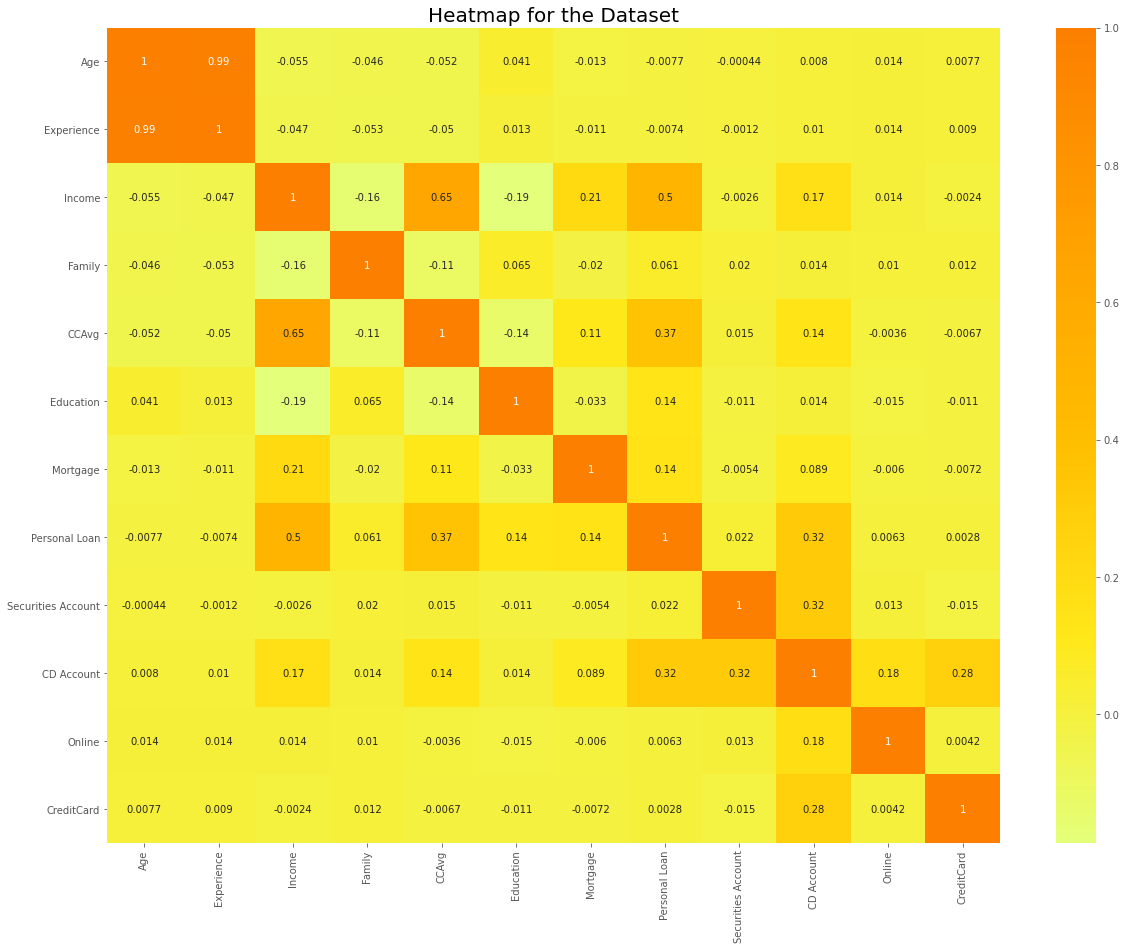

In [9]:
# making a heat map
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

Let's check the overall correlation in the heat map.  
'Age' and 'Exprerience' has so high correlation.  
So I'll delete one of them.    

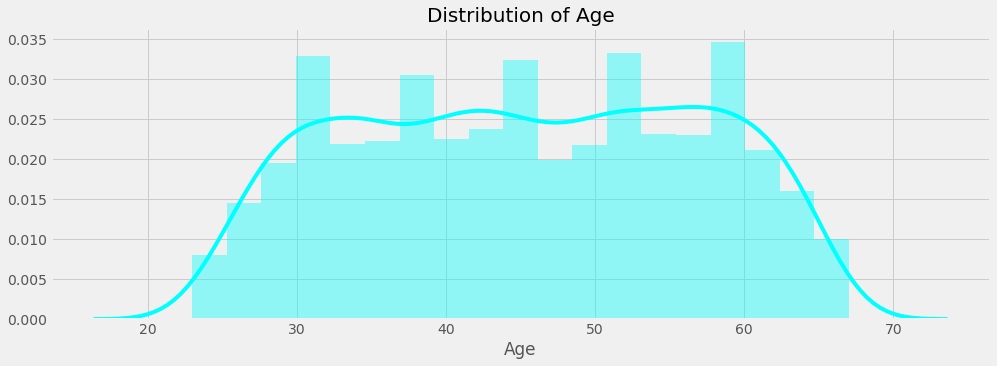

In [10]:
# checking the distribution of age

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['Age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The above chart shows distribution of age.  
Age is well-balanced.

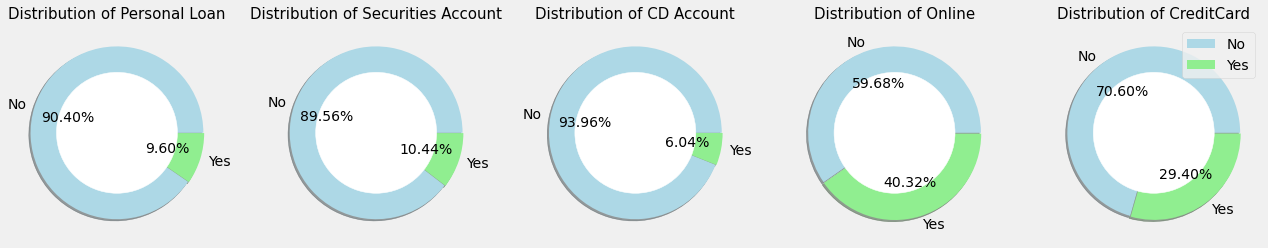

In [11]:
# plotting a donut chart for visualizing 'Personal Loan','Securities Account','CD Account','Online','CreditCard'

fig, ax = plt.subplots(1,5,figsize=(20,20))
columns = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

for i,column in enumerate(columns):
    plt.subplot(1,5,i+1)
    size = data[column].value_counts()
    colors = ['lightblue', 'lightgreen']
    labels = "No", "Yes"
    explode = [0, 0.01]

    my_circle = plt.Circle((0, 0), 0.7, color = 'white')

    plt.rcParams['figure.figsize'] = (20, 20)
    plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
    plt.title('Distribution of {}'.format(column), fontsize = 15)
    p = plt.gcf()
    p.gca().add_artist(my_circle)
plt.legend()
plt.show()

The above pie chart shows distribution of personal loan, securities account, CD account, online, and credit card.  
personal loan will be target of classification.  
So it's unbalance dataset.  

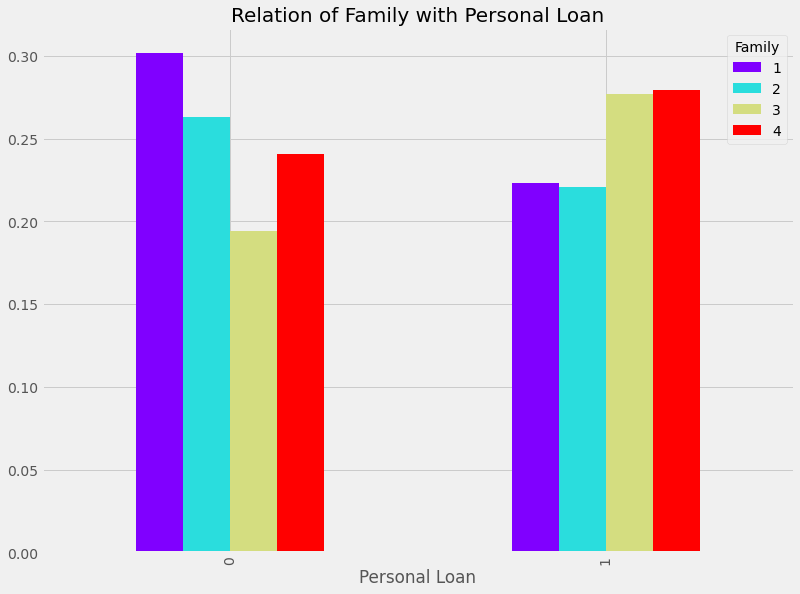

In [12]:
# show relation of family with personal loan
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['Personal Loan'], data['Family']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of Family with Personal Loan', fontsize = 20, fontweight = 30)
plt.show()


The above chart shows relation of family with personal loan.  
It seems that the more families there are, the more likely they are to make a loan.  

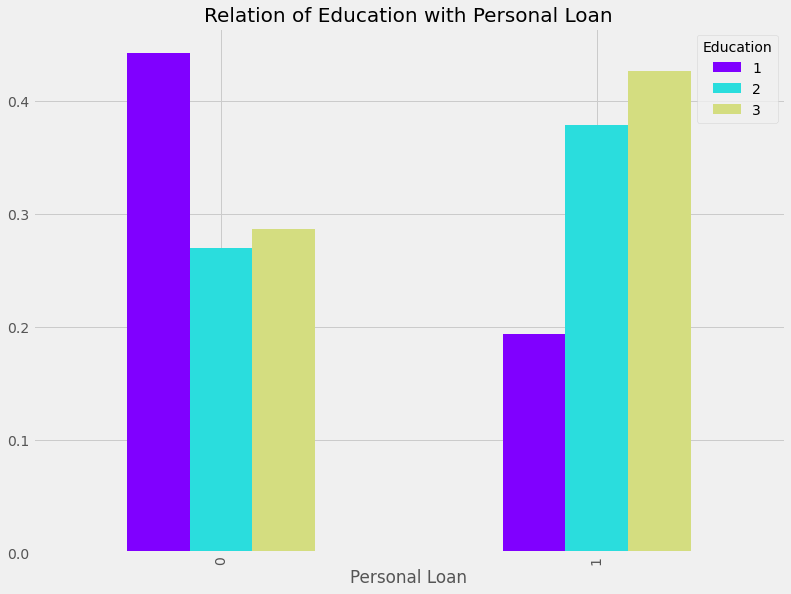

In [13]:
# show relation of education with personal loan
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['Personal Loan'], data['Education']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of Education with Personal Loan', fontsize = 20, fontweight = 30)
plt.show()


The above chart shows relation of Education with personal loan.  
It seems that people who have a high education tend to have a loan.  

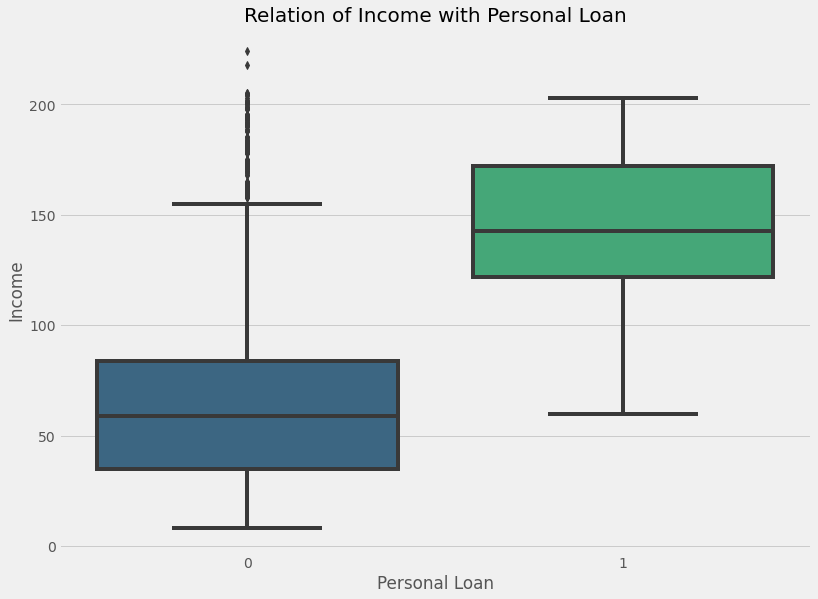

In [14]:
# show relation of income with personal loan

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['Personal Loan'], data['Income'], palette = 'viridis')
plt.title('Relation of Income with Personal Loan', fontsize = 20)
plt.show()

There is a clear difference in the relationship between income and personal loans.

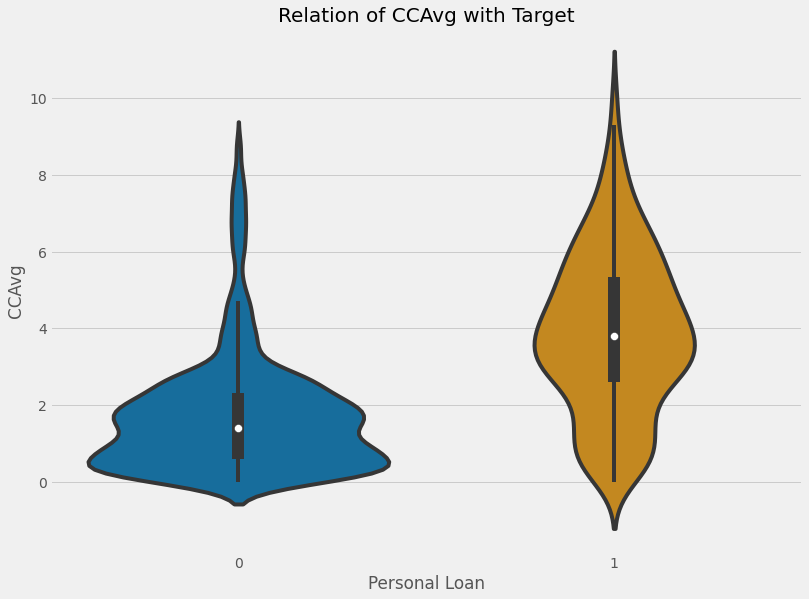

In [15]:
# show relation of CCAvg with personal loan

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['Personal Loan'], data['CCAvg'], palette = 'colorblind')
plt.title('Relation of CCAvg with Target', fontsize = 20, fontweight = 30)
plt.show()

Although not as much as income, CCAvg is also likely to be related to the availability of personal loans.

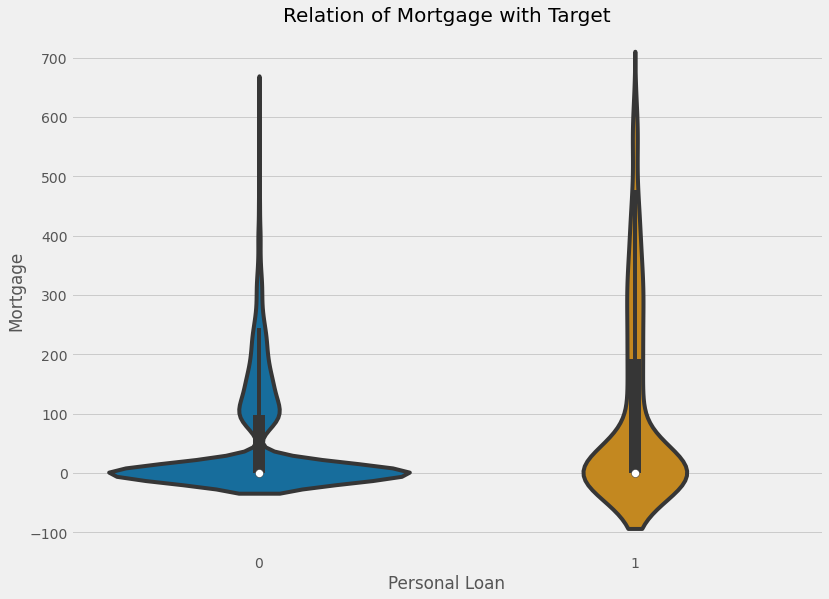

In [16]:
# show relation of mortgage with personal loan

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['Personal Loan'], data['Mortgage'], palette = 'colorblind')
plt.title('Relation of Mortgage with Target', fontsize = 20, fontweight = 30)
plt.show()

Mortgages seem to be unrelated to personal loans.

# Classification 

## Prepare Data

In [17]:
# Give meaning to category data 

data['Securities Account'][data['Securities Account'] == 0] = 'No'
data['Securities Account'][data['Securities Account'] == 1] = 'Yes'

data['CD Account'][data['CD Account'] == 0] = 'No'
data['CD Account'][data['CD Account'] == 1] = 'Yes'

data['Online'][data['Online'] == 0] = 'No'
data['Online'][data['Online'] == 1] = 'Yes'

data['CreditCard'][data['CreditCard'] == 0] = 'No'
data['CreditCard'][data['CreditCard'] == 1] = 'Yes'

<ipython-input-17-3f1f6bd8206b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-3f1f6bd8206b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-3f1f6bd8206b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-3f1f6bd8206b>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

In [18]:
data['Securities Account'] = data['Securities Account'].astype('object')
data['CD Account'] = data['CD Account'].astype('object')
data['Online'] = data['Online'].astype('object')
data['CreditCard'] = data['CreditCard'].astype('object')

# drop age (Because the correlation with experience is high.)
data = data.drop(["Age"],axis=1)

In [19]:
# taking the labels out from the data

y = data['Personal Loan']
data = data.drop('Personal Loan', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (5000,)


In [20]:
# One hot encoding
data = pd.get_dummies(data, drop_first=True)

In [21]:
# check data
data.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account_Yes,CD Account_Yes,Online_Yes,CreditCard_Yes
0,1,49,4,1.6,1,0,1,0,0,0
1,19,34,3,1.5,1,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,1


In [22]:
# Split the data
x = data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (4000, 10)
Shape of x_test : (1000, 10)
Shape of y_train : (4000,)
Shape of y_test : (1000,)


## Random Forest Classifier

Training Accuracy : 0.98825
Testing Accuracy : 0.985
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.96      0.87      0.91        90

    accuracy                           0.98      1000
   macro avg       0.97      0.93      0.95      1000
weighted avg       0.98      0.98      0.98      1000



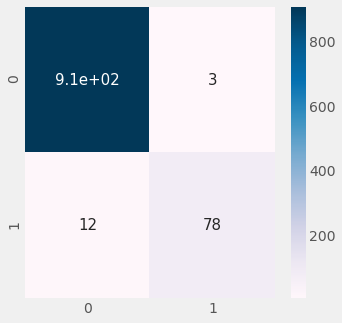

In [23]:
# MODELLING
# Random Forest Classifier

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [24]:
import pickle
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(model, open('model.pkl','wb'))